In [2]:
''' Todo
- put in an endtime date
- interactive plot, can do this in bash with plt.show, best way to do this within pycharm or on notebook?

'''
import numpy as np
import scipy.constants as cts
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Import the baking data


In [3]:
file_path = 'data/Bakelog_Sept_2024.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)


In [4]:
time_col = 'time_full'

# format time column to be a datetime
df['datetime'] = pd.to_datetime(df[time_col], format='%m/%d/%Y %H:%M')

time_col = 'datetime'

bake_temp_incr_date = '2024-09-02 10:40'
bake_equilibrium_start_date = '2024-09-05 13:40'
bake_cool_down_start_date = '2024-09-16 15:00'
end_date = '2024-09-17 14:50'

start_time = pd.to_datetime(bake_equilibrium_start_date, format='%Y-%m-%d %H:%M')
end_time = pd.to_datetime(end_date, format='%Y-%m-%d %H:%M')

df = df.sort_values(by='datetime')

# Filter the DataFrame
df = df[(df['datetime'] >= start_time) & (df['datetime'] <= end_time)]

In [5]:

# read in the relevant data sets
ion_pump_pressure_col = 'ion pump pressure (nTorr)'
turbo_pump_pressure_col = 'turbo pressure (picobar)'


# Filter main data frame into subsets of info to analyze

In [6]:
#filtered_df = df
ion_filtered_df = df.dropna(subset=[ion_pump_pressure_col])# Select the rows starting from the first valid index

# filtered_df = df.loc[first_valid_index:]
ion_filtered_df = ion_filtered_df[[time_col, ion_pump_pressure_col]]  # Select only the 'time' and 'ion pump pressure' columns


# Ways to plot the data

In [7]:


def plot_shit(df, xcol, ycol, title, ylabel, xlabel, filename,time_inteval='3H'):
    sns.set(style="whitegrid")
    
    sns.lineplot(data=df, x=xcol, y=ycol, marker='o')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    # Set additional x-ticks
    xticks = pd.date_range(start=df[xcol].min(), end=df[xcol].max(), freq=time_inteval)
    plt.xticks(ticks=xticks, rotation=90)

    plt.savefig(f'{filename}.png', bbox_inches='tight')
    plt.show()
    sns.set(style="whitegrid")
    
def plot_log_shit(xcol,ycol,xlabel='',ylabel='',title='',time_inteval='12H',filename=filename):
    plt.figure(figsize=(10, 6))
    plt.semilogy(xcol, ycol, marker='o')

    # Customize the plot
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True, which="both", ls="--")

    # Set additional x-ticks at 12-hour intervals
    xticks = pd.date_range(start=df['datetime'].min(), end=df['datetime'].max(), freq=time_inteval)
    plt.xticks(ticks=xticks, rotation=90)

    # Save the plot to a file with tight bounding box
    plt.savefig(f'{filename}.png', bbox_inches='tight')

    # Display the plot
    plt.show()


# Plotting the pressure over time
## rerun importing of the database to ensure it grabs the new data

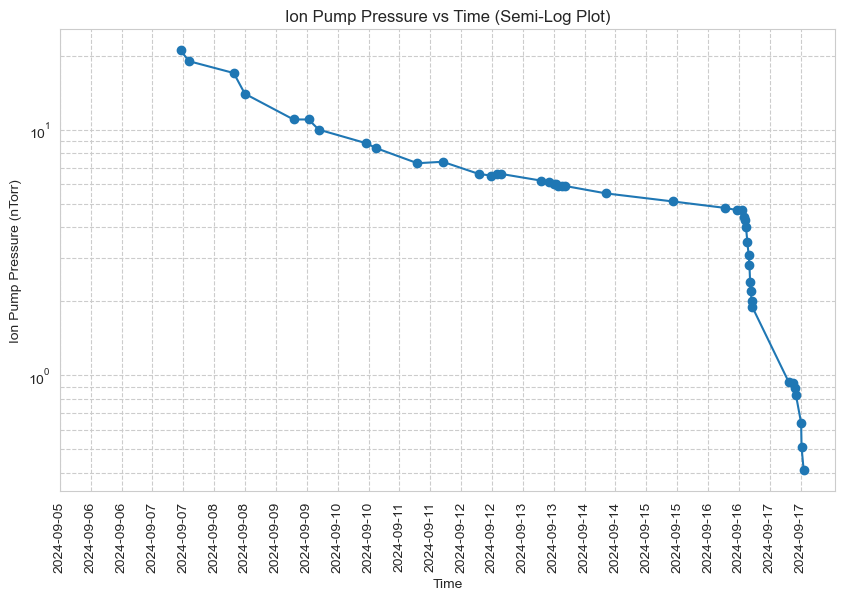

In [8]:
plot_log_shit(df['datetime'],df[ion_pump_pressure_col],xlabel='Time',ylabel='Ion Pump Pressure (nTorr)',title='Ion Pump Pressure vs Time (Semi-Log Plot)',time_inteval='12H',filename='ion_pump_pressure_semi_log_plot')

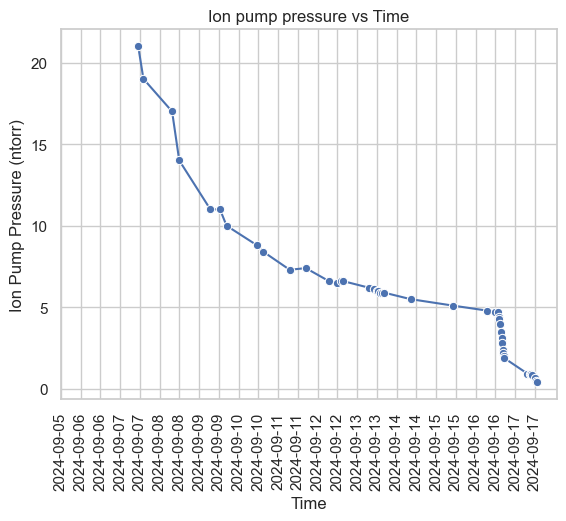

In [22]:
plot_shit(df, time_col, ion_pump_pressure_col,'Ion pump pressure vs Time', 'Ion Pump Pressure (ntorr)','Time', 'ion output',time_inteval='12H')

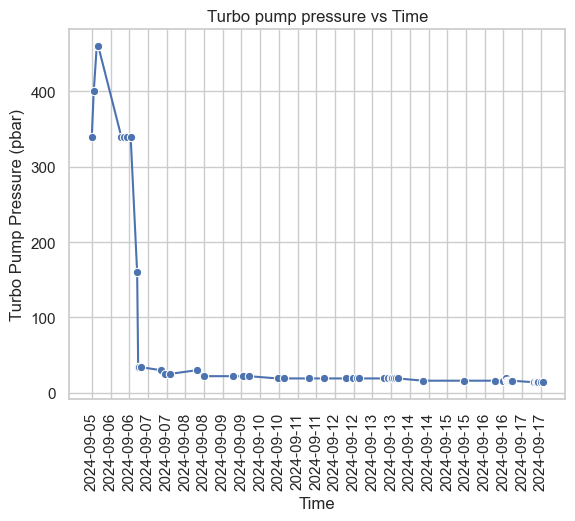

In [28]:
plot_shit(df, time_col, turbo_pump_pressure_col,'Turbo pump pressure vs Time', 'Turbo Pump Pressure (pbar)','Time', 'turbo_output',time_inteval='12H')

# Plotting the temperatures
## Define the thermocouple and heater column data

In [24]:
# read in temperature readings
t1 = 't1 (H3/H6)'
t2 = 't2 (H7)'
t3 = 't3 (H3)'
t4 = 't4** (H3/H7/H4)'
t4b = 't4b (H3/H7/H4)'
t5 = 't5 (H3/H7)'
t6 = 't6 (H3/H7/H4)'
t8 = 't8 (DPT)'
t9 = 't9 (H9)'
t10 = 't10 (H8)'
t11 = 't11 (H13)'
t12 = 't12 (H10)'
t13 = 't13 (H11)'
t14 = 't14 (H12)'
t15 = 't15 (H14)'
t17 = 't17 H1(near)'
t17b = 't17b (H1(mid))'
t18 = 't18 (H1(far))'
t19 = 't19 (H4)'
t20 = 't20 (H2)'
t21 = 't21 (H7/H8)'
t22 = 't22 (H4/H5)'
t23 = 't23 (H4/H3(mount))'
t24 = 't24 (H2)'
t25 = 't25 (H5)'
t26 = 't26 (H4/H5)'
t27 = 't27 (H2/H3)'
t28 = 't28 (H1/H2)'
t30 = 't30 (H6)'

# read in heater settings
H1 = 'H1'
H2 = 'H2'
H3 = 'H3'
H4 = 'H4'
H5 = 'H5(V)'
H6 = 'H6(V)'
H7 = 'H7'
H8 = 'H8'
H9 = 'H9'
H10 = 'H10'
H11 = 'H11'
H12 = 'H12'
H13 = 'H13(%)'
H14 = 'H14(V)'

In [1]:
filename = "ion_pump_heat_rise_temp"

sns.set(style="whitegrid")
plt.figure(figsize=(50, 30))
    

sns.lineplot(data=df, x=time_col, y=t20, marker='o',label="top of ion pump")

sns.lineplot(data=df, x=time_col, y=t24, marker='o',label="side of ion pump")

sns.lineplot(data=df, x=time_col, y=t27, marker='o',label="cross connection to ion pump flange")


plt.xlabel("time",fontsize =20)
plt.ylabel("temperature (C)",fontsize =20)

plt.grid(True)
# Set additional x-ticks

# frequency of ticks every 3 hours
xticks = pd.date_range(start=df[time_col].min(), end=df[time_col].max(), freq='1H')
plt.xticks(ticks=xticks, rotation=90,fontsize=20)
plt.yticks(ticks=np.arange(20,115,5),fontsize =20)

plt.savefig(f'plots/{filename}.pdf', bbox_inches='tight')
plt.show()

sns.set(style="whitegrid")

NameError: name 'sns' is not defined

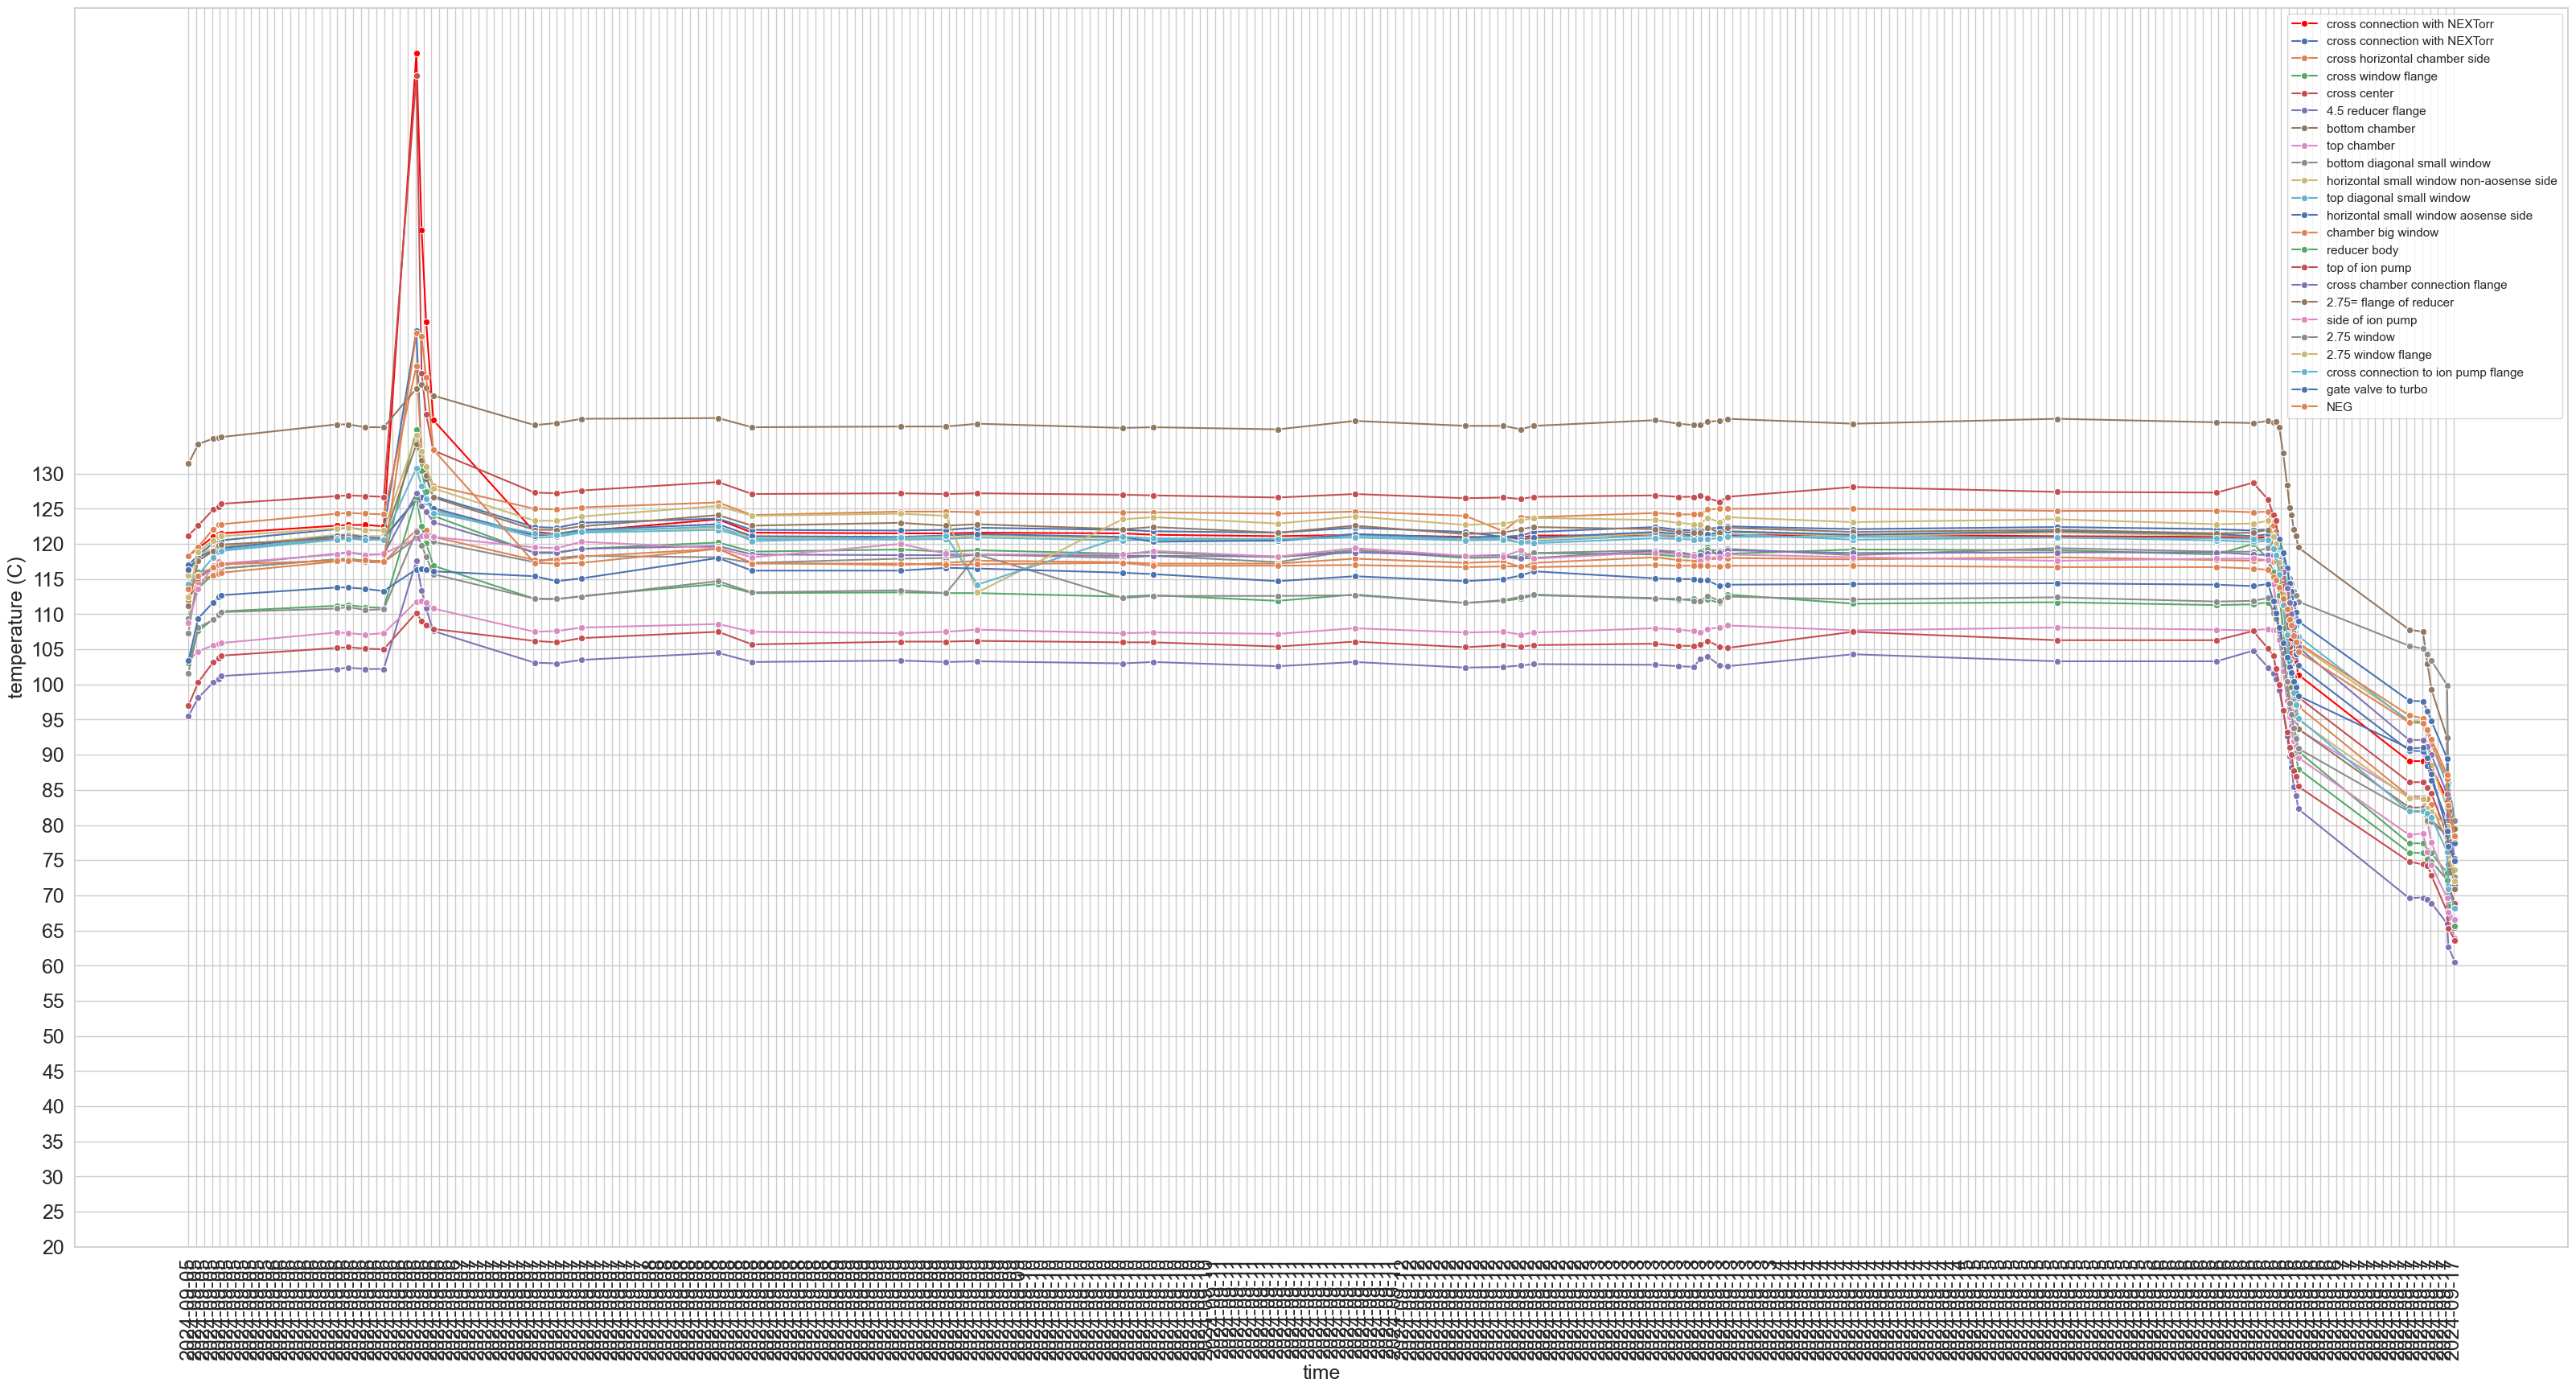

In [26]:
filename = "temps_rise"
sns.set(style="whitegrid")
plt.figure(figsize=(40, 20))
    
sns.lineplot(data=df, x=time_col, y=t1, marker='o',color='red', label="cross connection with NEXTorr")
sns.lineplot(data=df, x=time_col, y=t2, marker='o',label="cross connection with NEXTorr")
sns.lineplot(data=df, x=time_col, y=t3, marker='o',label="cross horizontal chamber side")
sns.lineplot(data=df, x=time_col, y=t4b, marker='o', label= "cross window flange")
sns.lineplot(data=df, x=time_col, y=t5, marker='o',label="cross center")
sns.lineplot(data=df, x=time_col, y=t6, marker='o', label="4.5 reducer flange")
#sns.lineplot(data=df, x=time_col, y=t8, marker='o',label="DPT")
sns.lineplot(data=df, x=time_col, y=t9, marker='o',label="bottom chamber")
sns.lineplot(data=df, x=time_col, y=t10, marker='o',label="top chamber")
sns.lineplot(data=df, x=time_col, y=t11, marker='o',label="bottom diagonal small window")
sns.lineplot(data=df, x=time_col, y=t12, marker='o',label="horizontal small window non-aosense side",)
sns.lineplot(data=df, x=time_col, y=t13, marker='o',label="top diagonal small window")
sns.lineplot(data=df, x=time_col, y=t14, marker='o',label="horizontal small window aosense side")
sns.lineplot(data=df, x=time_col, y=t15, marker='o',label="chamber big window")
#sns.lineplot(data=df, x=time_col, y=t17, marker='o')
#sns.lineplot(data=df, x=time_col, y=t17b, marker='o')
#sns.lineplot(data=df, x=time_col, y=t18, marker='o')
sns.lineplot(data=df, x=time_col, y=t19, marker='o',label="reducer body")
sns.lineplot(data=df, x=time_col, y=t20, marker='o',label="top of ion pump")
sns.lineplot(data=df, x=time_col, y=t21, marker='o',label = "cross chamber connection flange")
sns.lineplot(data=df, x=time_col, y=t22, marker='o',label="2.75= flange of reducer")
#sns.lineplot(data=df, x=time_col, y=t23, marker='o')
sns.lineplot(data=df, x=time_col, y=t24, marker='o',label="side of ion pump")
sns.lineplot(data=df, x=time_col, y=t25, marker='o',label="2.75 window")
sns.lineplot(data=df, x=time_col, y=t26, marker='o',label="2.75 window flange")
sns.lineplot(data=df, x=time_col, y=t27, marker='o',label="cross connection to ion pump flange")
sns.lineplot(data=df, x=time_col, y=t28, marker='o',label="gate valve to turbo")
sns.lineplot(data=df, x=time_col, y=t30, marker='o',label="NEG")

plt.xlabel("time",fontsize =18)
plt.ylabel("temperature (C)",fontsize =18)

plt.grid(True)
# Set additional x-ticks

# frequency of ticks every 3 hours
xticks = pd.date_range(start=df[time_col].min(), end=df[time_col].max(), freq='1H')
plt.xticks(ticks=xticks, rotation=90,fontsize=18)
plt.yticks(ticks=np.arange(20,135,5),fontsize =18)

plt.savefig(f'plots/{filename}.pdf', bbox_inches='tight')
plt.show()

sns.set(style="whitegrid")

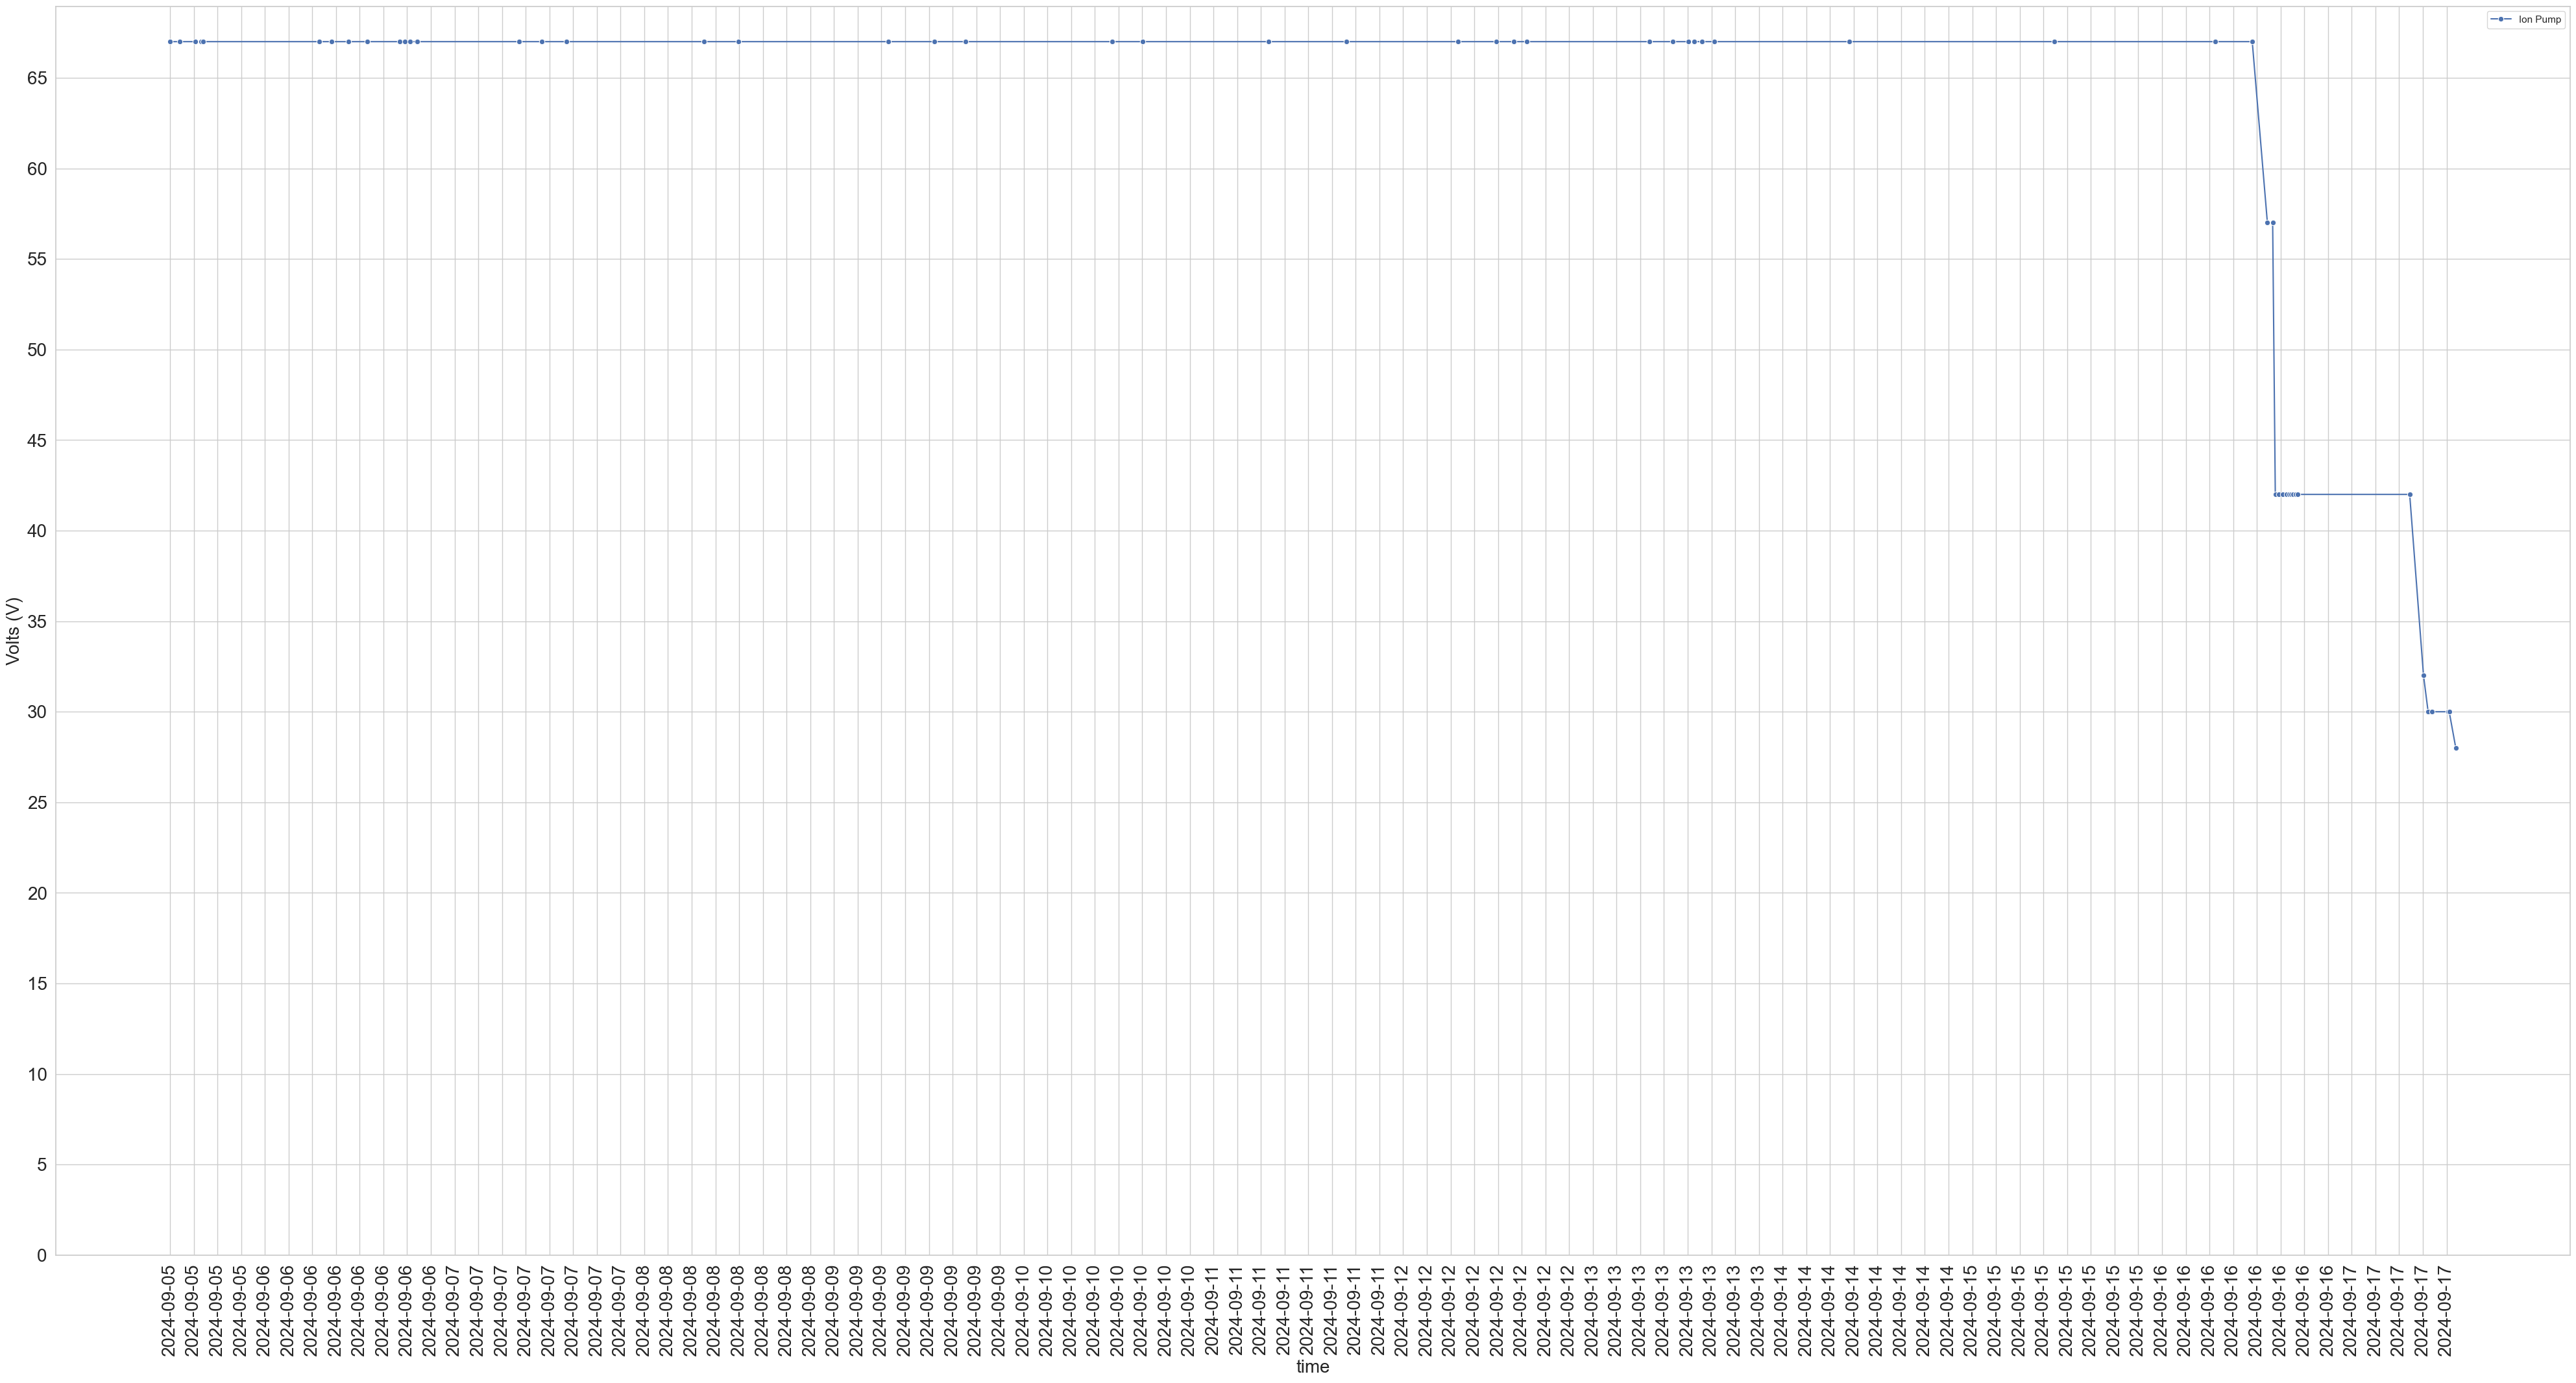

In [27]:
filename = "temps_ion2"
sns.set(style="whitegrid")
plt.figure(figsize=(50, 25))
    
#sns.lineplot(data=df, x=time_col, y=H1, marker='o',color='red', label="Hose")
sns.lineplot(data=df, x=time_col, y=H2, marker='o',label="Ion Pump")
#sns.lineplot(data=df, x=time_col, y=H3, marker='o',label="vertical of cross")
#sns.lineplot(data=df, x=time_col, y=H4, marker='o', label= "conical reducer")
#sns.lineplot(data=df, x=time_col, y=H5, marker='o',label="cross center")
#sns.lineplot(data=df, x=time_col, y=H6, marker='o', label="4.5 reducer flange")
#sns.lineplot(data=df, x=time_col, y=H7, marker='o',label="horizontal chamber side of cross")
#sns.lineplot(data=df, x=time_col, y=H8, marker='o',label="cross side of chamber")
#sns.lineplot(data=df, x=time_col, y=H9, marker='o',label="big window side of chamber")
#sns.lineplot(data=df, x=time_col, y=H10, marker='o',label="Horizontal viewport on the non-aosense side")
#sns.lineplot(data=df, x=time_col, y=H11, marker='o',label="Top viewport on the non-aosense side",)
#sns.lineplot(data=df, x=time_col, y=H12, marker='o',label="Horizontal window on the aosense side")
#sns.lineplot(data=df, x=time_col, y=H13, marker='o',label="Bottom viewport on the aosense side")
#sns.lineplot(data=df, x=time_col, y= H14, marker='o',label="chamber big window")


plt.xlabel("time",fontsize =20)
plt.ylabel("Volts (V)",fontsize =20)

plt.grid(True)
# Set additional x-ticks

# frequency of ticks every 3 hours
xticks = pd.date_range(start=df[time_col].min(), end=df[time_col].max(), freq='3H')
plt.xticks(ticks=xticks, rotation=90,fontsize=20)
plt.yticks(ticks=np.arange(0,70,5),fontsize =20)

plt.savefig(f'{filename}.png', bbox_inches='tight')
plt.show()

sns.set(style="whitegrid")